## Correlation

* Is a measure of association between two variables.
* It's easy to calculate and interpret when the two variables have well undertood Gussian distribution.
* But when we don't know the distribution of the variables, we must use non-parametric rank correlation.

Two associations have either:
* Positive association: The two variables increase together.
* Negative association: One inceases but the other decreases.
* Neutral association: No association.

We so earlier that methods as pearson are used to calculate the correlation between two variables that have Gaussian/Normal distribution, This method can not be used for non-Gaussian distribution, hence using rank correlation method like, spearman method.

Because no distribution for the values is assumed, rank correlation mathods are referred to as distribution-free correlation or non-parametric correlation.

Some rank correlation methods are :
* Spearman's rank correlation.
* Kendall's rank correlation.
* Goodman and Kruskal’s Rank Correlation.
* Somers’ Rank Correlation.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

In [17]:
iq = [106, 86, 100, 101, 99, 103, 97, 113, 112, 110]
tv_per_week = [7, 0, 27, 50, 28, 29, 20, 12, 6, 17]

In [18]:
data = pd.DataFrame({'IQ': iq, 'tv per hour': tv_per_week})
data

,IQ,tv per hour
0,106,7
1,86,0
2,100,27
3,101,50
4,99,28
5,103,29
6,97,20
7,113,12
8,112,6
9,110,17


In [19]:
from chartify.scatter_it import scatter_it

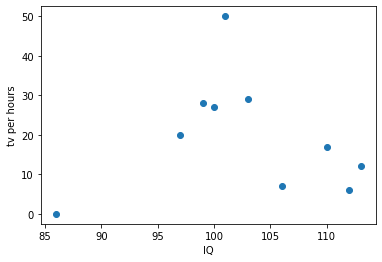

In [20]:
scatter_it(data['IQ'], data['tv per hour'], 'IQ', 'tv per hours')

In [21]:
iq = data['IQ']
tv_per_hour = data['tv per hour']
rho, p_value = spearmanr(iq, tv_per_hour)
print(f'rho = {rho}, p = {p_value}')

rho = -0.17575757575757575, p = 0.6271883447764844


In [22]:
iq = data['IQ']
tv_per_hour = data['tv per hour']
rho, p_value = pearsonr(iq, tv_per_hour)
print(f'rho = {rho}, p = {p_value}')

rho = -0.03760147384687601, p = 0.9178629727717285


### Pearson implementation
The pearson formula is :

$$
\rho_{X, Y} = \frac{\text{Cov}(X, Y)}{\sigma_x \sigma_y} \approx \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n(y_i - \bar{y})^2}}
$$

* Cov(X, Y): co-variance of X and Y.
* sigma(x) is the standard deviation of X
* sigma(y) is the standard deviation of Y
* x_bar is the mean of X.

In [34]:
from correlation.pearson import my_pearson

In [24]:
my_pearson(iq, tv_per_hour)

-0.03760147384687592

As we see, we get the same result as the built-in scipy function

## Spearman implementation

$$
\rho_S(X, Y) = \frac{Cov(rk_X, rk_Y)}{\sigma_x\sigma_y} \approx  \frac{\sum_{i=1}^n (rk(x_i) - rk(\bar{x}))(rk(y_i) - rk(\bar{y}))}{\sqrt{\sum_{i=1}^n (rk(x_i) - rk(\bar{x}))^2}\sqrt{\sum_{i=1}^n(rk(y_i) - rk(\bar{y}))^2}}
$$

The spearman's coefficient is the same as pearson's coefficient, except in spearman we deal with the rank of the sample while in pearson we deal with the sample itself

To compute the rank of each sample we gonna use the rankdata function in scipy library.

In [25]:
from scipy.stats import rankdata
from correlation.spearman import my_spearman

In [26]:
my_spearman(iq, tv_per_hour)

-0.17575757575757575

In [27]:
from correlation.spearman import spearman_method_process

In [28]:
df, rho = spearman_method_process(data)

In [29]:
df

,IQ,tv per hour,x rank,y rank,d,d^2
0,106,7,4.0,8.0,-4.0,16.0
1,86,0,10.0,10.0,0.0,0.0
2,100,27,7.0,4.0,3.0,9.0
3,101,50,6.0,1.0,5.0,25.0
4,99,28,8.0,3.0,5.0,25.0
5,103,29,5.0,2.0,3.0,9.0
6,97,20,9.0,5.0,4.0,16.0
7,113,12,1.0,7.0,-6.0,36.0
8,112,6,2.0,9.0,-7.0,49.0
9,110,17,3.0,6.0,-3.0,9.0


In [30]:
rho

-0.17575757575757578

##### As we see it the same result as the built-in spearman function